In [1]:
from ausdex.seifa_vic.data_wrangling import wrangle_victorian_gis_data, get_aurin_datasets_vic

In [2]:
gdf_1986, gdf_1991, gdf_1996, gdf_2001 = get_aurin_datasets_vic()

In [4]:
gdf_1986.head()

,id,cd_code,state_,_seifa86_population_,index_of_relative_socio_economic_disadvantage_,_index_of_economic_resources_,index_of_education_and_occupation_,sla_,sla_name_,postal_areas_,state_name,geometry
0,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...,1010103,1,36,1069.00290,1006.07980,898.74340,300,Balranald (S),2711,New South Wales,"MULTIPOLYGON (((144.15360 -33.97960, 144.15450..."
1,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...,6010406,6,746,950.94415,968.09534,895.35345,4801,Wynyard (M) - Pt A,7325,Tasmania,"MULTIPOLYGON (((145.71700 -40.98920, 145.71090..."
2,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...,6010407,6,542,969.49850,910.61993,953.03815,4801,Wynyard (M) - Pt A,7325,Tasmania,"MULTIPOLYGON (((145.72330 -40.99050, 145.71930..."
3,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...,3011310,3,1423,1002.39300,1014.01310,985.62335,5401,Mulgrave (S) - Pt A,4870,Queensland,"MULTIPOLYGON (((145.74150 -16.96720, 145.74750..."
4,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...,3050708,3,377,960.89856,949.48320,856.07050,6100,Proserpine (S),4800,Queensland,"MULTIPOLYGON (((148.67320 -20.44520, 148.67340..."


In [3]:
suburbs, councils = wrangle_victorian_gis_data()

In [6]:
import geopandas as gpd

gdf_combined = gpd.overlay(suburbs.to_crs('EPSG:4326'), gdf_1986.to_crs('EPSG:4326'))

In [7]:
gdf_combined.columns

Index(['id_1', 'lc_ply_pid', 'dt_create', 'dt_retire', 'loc_pid', 'vic_locali',
       'vic_loca_1', 'vic_loca_2', 'vic_loca_3', 'vic_loca_4', 'vic_loca_5',
       'vic_loca_6', 'vic_loca_7', 'Site_suburb', 'id_2', 'cd_code', 'state_',
       '_seifa86_population_',
       'index_of_relative_socio_economic_disadvantage_',
       '_index_of_economic_resources_', 'index_of_education_and_occupation_',
       'sla_', 'sla_name_', 'postal_areas_', 'state_name', 'geometry'],
      dtype='object')

Text(0.5, 15.0, 'decimal degrees longitude')

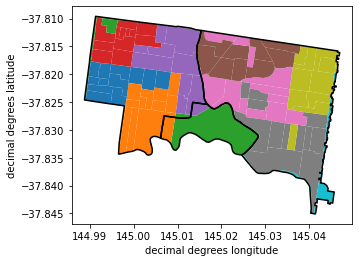

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

gdf_combined[(gdf_combined['Site_suburb']=='BURNLEY') |(gdf_combined['Site_suburb']=='RICHMOND')|(gdf_combined['Site_suburb']=='HAWTHORN')].plot('cd_code', ax=ax)
suburbs[(suburbs['Site_suburb']=='BURNLEY') |(suburbs['Site_suburb']=='RICHMOND')|(suburbs['Site_suburb']=='HAWTHORN')].boundary.plot(color='black', ax=ax)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('decimal degrees latitude')
ax.set_xlabel('decimal degrees longitude')